<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Clase01/Notebooks/d_Preprocesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 1 - Preprocesamiento de datos**

## **Objetivos de aprendizaje**

- Reconocer el impacto de la calidad y cantidad de datos en los algoritmos de ML
- Explicar un proceso típico de recolección y transformación de datos en el flujo de trabajo de ML
- Identificar cuando implementar transformaciones de características como imputación, escalamiento, one-hot-encoding

## **Ejemplo: Recomendación de canciones usando $k$-NN**

En este ejemplo usaremos $k-$NN para predecir si a un usuario le gustará una canción o no.

Intuición:

- Encuentre las canciones similares en el conjunto de entrenamiento a la canción a la que queremos hacer la predicción
- Por mayoría, escoger si al usuario le gustaron o no estas canciones
- Asignar la etiqueta a la nueva canción según el voto mayoritario

![Spotify recommendation](https://drive.google.com/uc?id=18lBxaBGX3n8BPxwyOnybK2CqtMHDp9Up)



## **Descarga de datos (opción 1)**

Lo primero que hará será descargar los datos con los que va a trabajar:

- Tabla de datos de clientes (archivo csv).

Este archivo quedará en la ruta _/content/data.csv asociada con el sistema operativo del servidor en el que se está ejecutando google colab.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UAeE2IQvuFxvwep1ThK7_DnpBfUB7eyr' -O data_spotify.csv



--2023-04-11 22:28:42--  https://docs.google.com/uc?export=download&id=1UAeE2IQvuFxvwep1ThK7_DnpBfUB7eyr
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.100, 74.125.195.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2sulapke543dhkjhd68jc60a3htkm2es/1681252050000/15315348669826032119/*/1UAeE2IQvuFxvwep1ThK7_DnpBfUB7eyr?e=download&uuid=487e2372-1ad3-4d0d-a7c9-428c161de1e1 [following]
--2023-04-11 22:28:43--  https://doc-08-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2sulapke543dhkjhd68jc60a3htkm2es/1681252050000/15315348669826032119/*/1UAeE2IQvuFxvwep1ThK7_DnpBfUB7eyr?e=download&uuid=487e2372-1ad3-4d0d-a7c9-428c161de1e1
Resolving doc-08-6c-docs.googleusercontent.com (doc-08-6c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:

## **Descarga de datos (opción 2)**

Vincular google colab con google drive

https://www.youtube.com/watch?v=6UnCrulz-fE



## **Importar librerías necesarias**

In [ ]:
import sys
import time

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import HTML

sys.path.append("code/.")

#import mglearn
from IPython.display import display
#from plotting_functions import *

# Classifiers and regressors
from sklearn.dummy import DummyClassifier, DummyRegressor

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer

# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from utils import *

pd.set_option("display.max_colwidth", 200)

## **Entrenamiento del modelo**


In [ ]:
# Cargar los datos
spotify_df = pd.read_csv("data_spotify.csv", index_col=0)
spotify_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
#Particiones de entrenamiento, validación y prueba
train_df, test_df = train_test_split(spotify_df, test_size=0.20, random_state=123)
train_df, val_df = train_test_split(train_df, test_size = 0.20, random_state=123)


In [ ]:
#Definir variable objetivo y eliminar variables no numéricas
X_train, y_train = (
    train_df.drop(columns=["song_title", "artist", "target"]),
    train_df["target"],
)

X_val, y_val = (
    val_df.drop(columns=["song_title", "artist", "target"]),
    val_df["target"],
)

X_test, y_test = (
    test_df.drop(columns=["song_title", "artist", "target"]),
    test_df["target"],
)


In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
accuracy = []

for k in n_neighbors:
  clf = Pipeline(steps=[("classifier", KNeighborsClassifier(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  accuracy.append(clf.score(X_val, y_val))

[Text(0.5, 0, 'Number of neighbors'),
 Text(0, 0.5, 'Accuracy (%)'),
 Text(0.5, 1.0, 'k-NN Classification')]

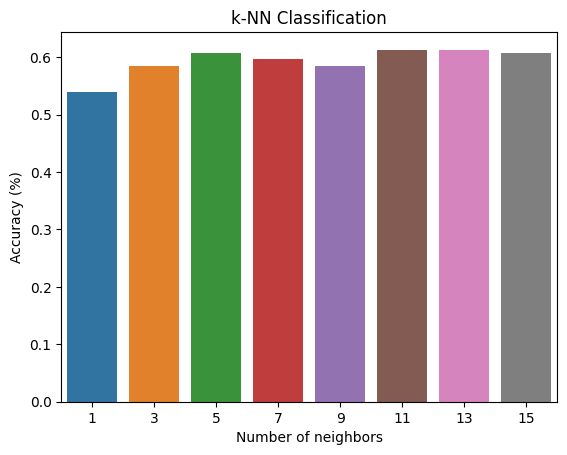

In [ ]:
gfg = sns.barplot(x = n_neighbors,y = accuracy)
gfg.set(xlabel ="Number of neighbors", ylabel = "Accuracy (%)", title ='k-NN Classification')

In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(accuracy)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train_test = pd.concat([X_train,X_val],axis=0)
y_train_test = np.hstack([y_train,y_val])

clf = Pipeline(steps=[("classifier", KNeighborsClassifier(n_neighbors=k_opt))])
clf.fit(X_train_test, y_train_test)
#Validar el rendimiento del clasificador con los datos de prueba
accuracy = clf.score(X_test, y_test)

print(f"La tasa de acierto de clasificación en el conjunto de test es {accuracy:0.2f}")

El número óptimo de vecinos es 11
La tasa de acierto de clasificación en el conjunto de test es 0.56


## ¿Cómo se calculan los vecinos más cercanos?

Notación matemática:

Cada fila de un dataframe será para nosotros un vector de n posiciones (vector de características):

$\mathbf{x}^{(i)} = \begin{bmatrix}
x_1^{(i)} \\
x_2^{(i)} \\
\vdots \\
x_n^{(i)}
\end{bmatrix} \in \Re^{n}$

El super-índice (i) denota la fila del dataframe

La distancia euclidiana sirve para saber qué tan lejos o cerca están dos vectores de características. Se calcula de la siguiente forma:

$d(\mathbf{x}^{(1)},\mathbf{x}^{(2)}) = \sqrt{(x_1^{(1)} - x_1^{(2)})^2 + (x_2^{(1)} - x_2^{(2)})^2 + ... + (x_n^{(1)} - x_n^{(2)})^2}$

In [ ]:
#Tomemos dos filas del dataframe y calculemos la distancia euclidiana
two_songs = X_train.sample(2, random_state=42)
two_songs

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1890,0.1600,0.561,295493,0.555,0.000000,11,0.114,-9.734,0,0.0287,134.369,4.0,0.509
1351,0.0145,0.716,215253,0.972,0.000032,7,0.317,-2.302,1,0.1960,110.026,4.0,0.566


In [ ]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
dist_matrix = squareform(pdist(two_songs, metric='euclidean'))
print(dist_matrix)

[[    0.         80240.00414449]
 [80240.00414449     0.        ]]


In [ ]:
#Consideremos ahora únicamente dos características (distancia y tiempo)
two_songs_subset = two_songs[["duration_ms", "tempo"]]
two_songs_subset

,duration_ms,tempo
1890,295493,134.369
1351,215253,110.026


In [ ]:
dist_matrix = squareform(pdist(two_songs_subset, metric='euclidean'))
print(dist_matrix)

[[    0.         80240.00369256]
 [80240.00369256     0.        ]]


¿Encontramos algún problema?

- La distancia está completamente dominada por las características con valores más grandes.
- Las características con valores más pequeños están siendo ignoradas.
- ¿Importa?
  - ¡Sí! La escala se basa en cómo se recopilaron los datos.
  - Las características en una escala más pequeña pueden ser altamente informativas y no hay una buena razón para ignorarlas.
  - Queremos que nuestro modelo sea robusto y no sea sensible a la escala.

Este problema aplica para todos los modelos que usan distancias en su formulación, regresión lineal, logística, redes neuronales.

¡No aplica para modelos basados en árboles de decisión!

### Escalamiento usando [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) de `scikit-learn`

- Utilizaremos [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) de `scikit-learn`, que es un `transformer`.   
- Por ahora nos centraremos en la sintaxis.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Crear objeto transformador de características
scaler.fit(X_train)  # ajustar el transformador en la división de entrenamiento
X_train_scaled = scaler.transform(X_train)  # transformar la división de entrenamiento
X_val_scaled = scaler.transform(X_val)   # transformar la división de validación
X_test_scaled = scaler.transform(X_test)  # transformar la división de prueba

In [ ]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
432,0.19800,0.507,286413,0.739,0.865000,2,0.1850,-9.728,1,0.0400,87.569,4.0,0.170
1673,0.11400,0.858,290836,0.697,0.000000,2,0.2240,-5.361,1,0.2300,98.012,4.0,0.365
1172,0.02350,0.667,172893,0.648,0.000015,3,0.0427,-6.398,0,0.0626,95.031,4.0,0.585
961,0.08530,0.864,126467,0.552,0.778000,5,0.0940,-8.851,0,0.0495,112.378,4.0,0.740
1964,0.00513,0.685,267947,0.948,0.003470,9,0.1700,-5.182,1,0.0457,104.881,4.0,0.627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,0.00141,0.895,179000,0.883,0.000383,7,0.2740,-8.919,1,0.2160,131.644,4.0,0.893
1417,0.04150,0.370,250240,0.870,0.000000,5,0.6040,-2.090,1,0.2710,79.092,4.0,0.334
575,0.00470,0.777,309180,0.688,0.690000,8,0.0960,-8.692,0,0.0681,126.019,4.0,0.180
686,0.35600,0.667,234994,0.901,0.003930,9,0.0774,-3.719,0,0.0275,140.026,4.0,0.824


Examinemos el valor transformado de la característica `energía` en la primera fila.

In [ ]:
X_train['energy'].iloc[0]

0.739

In [ ]:
(X_train['energy'].iloc[0] - np.mean(X_train['energy']))/ X_train['energy'].std()


0.28059979079502617

In [ ]:
pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index).head().round(3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
432,0.035,-0.665,0.480,0.281,2.614,-0.906,-0.024,-0.661,0.774,-0.596,-1.282,0.163,-1.317
1673,-0.284,1.493,0.534,0.086,-0.493,-0.906,0.228,0.473,0.774,1.608,-0.897,0.163,-0.520
1172,-0.628,0.319,-0.919,-0.141,-0.493,-0.632,-0.943,0.204,-1.293,-0.334,-1.007,0.163,0.378
961,-0.393,1.530,-1.491,-0.585,2.302,-0.084,-0.612,-0.433,-1.293,-0.486,-0.367,0.163,1.011
1964,-0.697,0.430,0.252,1.248,-0.481,1.011,-0.121,0.519,0.774,-0.530,-0.643,0.163,0.550


## Paradigma `fit` y `transform` para transformadores

- `sklearn` utiliza los paradigmas `fit` y `transform` para transformaciones de características.
- Ajustamos el transformador en la división de entrenamiento y luego transformamos tanto la división de entrenamiento como la de prueba.
- Aplicamos las mismas transformaciones en las divisiones de validacion y prueba.

## Resumen de la API `sklearn`: transformadores

Supongamos que transformer es un transformador utilizado para cambiar la representación de entrada, por ejemplo, para completar valores faltantes o escalar características numéricas.

```
transformer.fit(X_train, [y_train])
X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)
```

- Puedes pasar y_train en fit pero generalmente se ignora. Te permite pasarlo solo para ser coherente con el uso habitual del método fit de sklearn.
- También puedes llevar a cabo el ajuste y la transformación en una sola llamada usando `fit_transform`. Pero ten en cuenta que debes usarlo solo en la división de entrenamiento y no en la división de validación o de prueba.

## Re-entrenamiento del modelo incluyendo el escalamiento



In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
accuracy = []

for k in n_neighbors:
  clf = Pipeline(steps=[("classifier", KNeighborsClassifier(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train_scaled, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  accuracy.append(clf.score(X_val_scaled, y_val))

In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(accuracy)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train_test_scaled = np.vstack([X_train_scaled,X_val_scaled])
y_train_test = np.hstack([y_train,y_val])

clf = Pipeline(steps=[("classifier", KNeighborsClassifier(n_neighbors=k_opt))])
clf.fit(X_train_test_scaled, y_train_test)
#Validar el rendimiento del clasificador con los datos de prueba
accuracy = clf.score(X_test_scaled, y_test)

print(f"La tasa de acierto de clasificación en el conjunto de test es {accuracy:0.2f}")

El número óptimo de vecinos es 15
La tasa de acierto de clasificación en el conjunto de test es 0.69


La tasa de acierto es mejor (casi 10%) con los datos escalados

### Utilizando `Pipelines` de `sklearn`

Un pipeline en scikit-learn es un objeto que permite concatenar varios pasos de preprocesamiento y modelado en un solo estimador. Los pipelines son útiles para automatizar el flujo de trabajo, garantizar que los pasos se apliquen consistentemente en los conjuntos de entrenamiento y prueba, y facilitar la integración con la validación cruzada y la optimización de hiperparámetros.

In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
accuracy = []

for k in n_neighbors:
  clf = Pipeline(steps=[("preprocessor", StandardScaler()), ("classifier", KNeighborsClassifier(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  accuracy.append(clf.score(X_val, y_val))

[Text(0.5, 0, 'Number of neighbors'),
 Text(0, 0.5, 'Accuracy (%)'),
 Text(0.5, 1.0, 'k-NN Classification')]

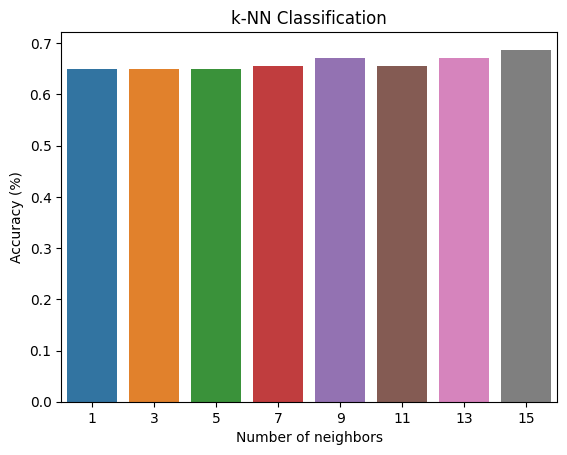

In [ ]:
gfg = sns.barplot(x = n_neighbors,y = accuracy)
gfg.set(xlabel ="Number of neighbors", ylabel = "Accuracy (%)", title ='k-NN Classification')

In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(accuracy)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train_test = pd.concat([X_train,X_val],axis=0)
y_train_test = np.hstack([y_train,y_val])

clf = Pipeline(steps=[("preprocessor", StandardScaler()),("classifier", KNeighborsClassifier(n_neighbors=k_opt))])
clf.fit(X_train_test, y_train_test)
#Validar el rendimiento del clasificador con los datos de prueba
accuracy = clf.score(X_test, y_test)

print(f"La tasa de acierto de clasificación en el conjunto de test es {accuracy:0.2f}")

El número óptimo de vecinos es 15
La tasa de acierto de clasificación en el conjunto de test es 0.70
